In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import set_config
from sklearn.preprocessing import FunctionTransformer
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error , mean_absolute_error , r2_score

# **Import walmart dataset**

In [11]:
df = pd.read_csv('/content/WALMART_SALES_DATA.csv')

In [5]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.shape

(6435, 8)

In [7]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [32]:
def do_preprocess(df):
  df['month'] = df['Date'].str.split('-' , expand=True)[1].astype('int')
  df['year'] = df['Date'].str.split('-' , expand=True)[2].astype('int')
  df.drop('Date' , axis=1 , inplace=True)
  return df
custom_transformer = FunctionTransformer(do_preprocess , validate=False)

In [33]:
 preprocessor = ColumnTransformer(transformers=[
     ('preprocess' , custom_transformer , ['Date'])
 ] , remainder='passthrough')

# **We creates pipeline for our model**

In [34]:
pipeline = Pipeline([
    ('preprocessor' , preprocessor),
    ('model' , XGBRegressor())
])

In [35]:
set_config(display='diagram')
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess',
                                                  FunctionTransformer(func=<function do_preprocess at 0x7bb78c4332e0>),
                                                  ['Date'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=No...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

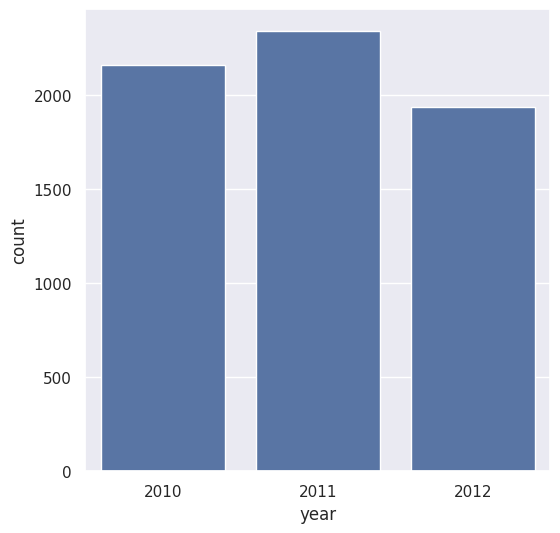

In [10]:
import seaborn as sns
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x = 'year' , data = df)
plt.show()

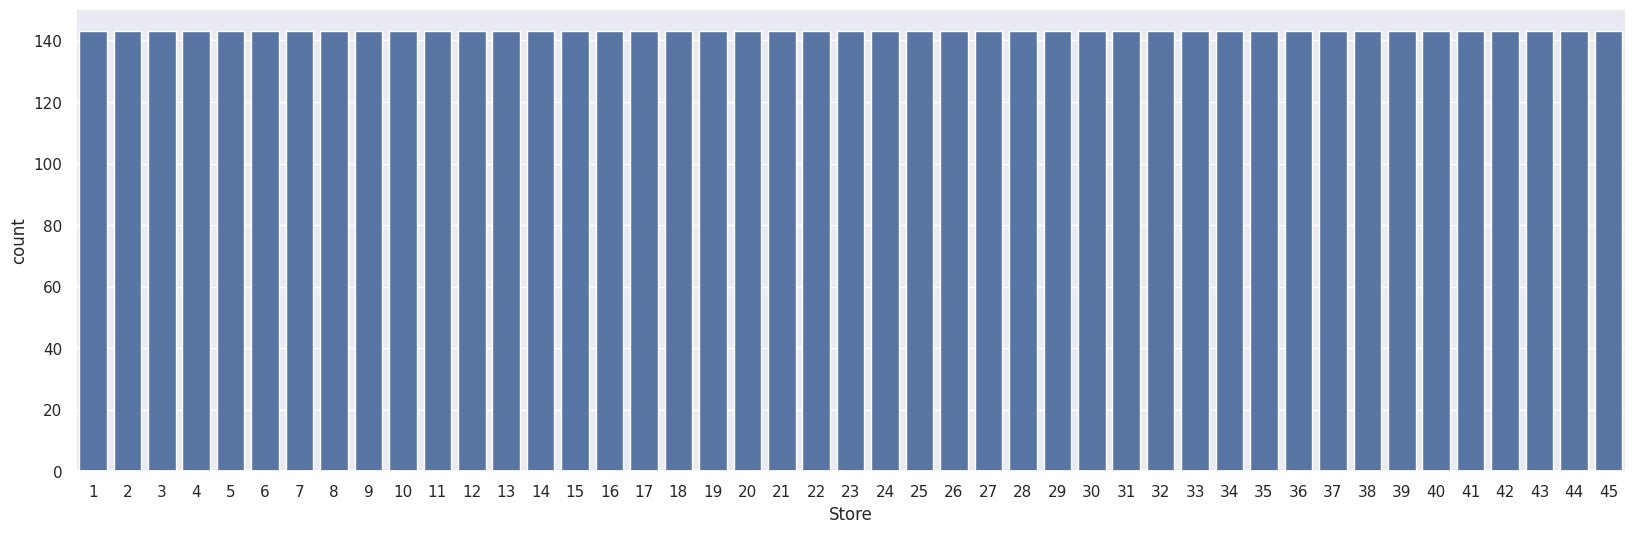

In [11]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Store' , data = df)
plt.show()

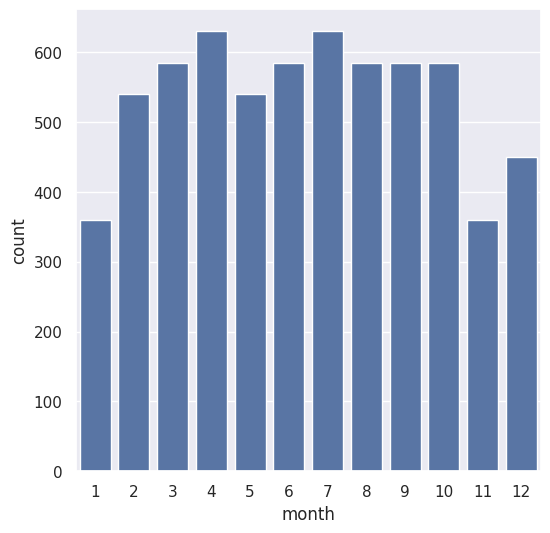

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'month' , data = df)
plt.show()


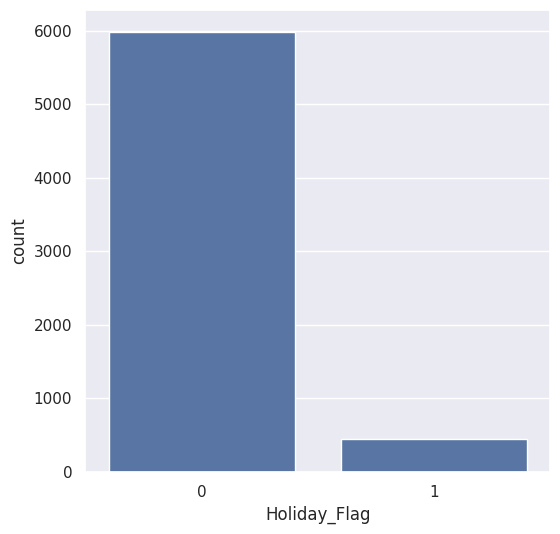

In [13]:
plt.figure(figsize=(6,6))
sns.countplot(x = 'Holiday_Flag' , data = df)
plt.show()

<ipython-input-14-4d5e6d9fed35>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Temperature'])


<Axes: xlabel='Temperature', ylabel='Density'>

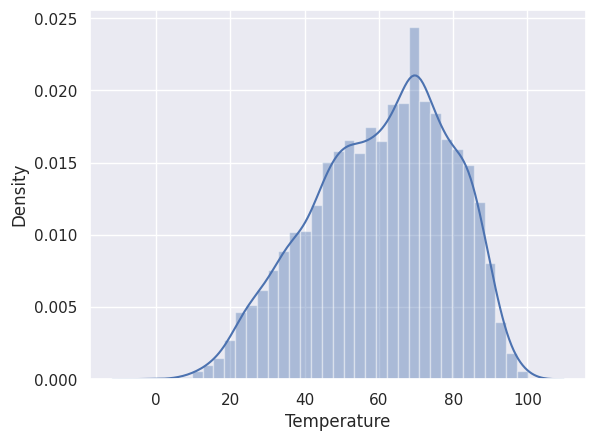

In [14]:
sns.distplot(df['Temperature'])

<ipython-input-15-365e5f265625>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fuel_Price'])


<Axes: xlabel='Fuel_Price', ylabel='Density'>

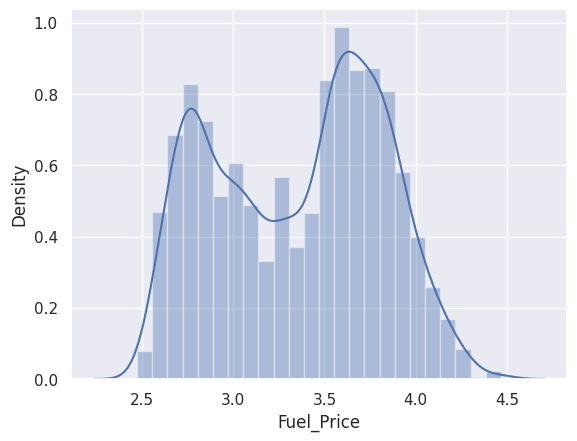

In [15]:
sns.distplot(df['Fuel_Price'])

<ipython-input-16-01c4611d025c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['CPI'])


<Axes: xlabel='CPI', ylabel='Density'>

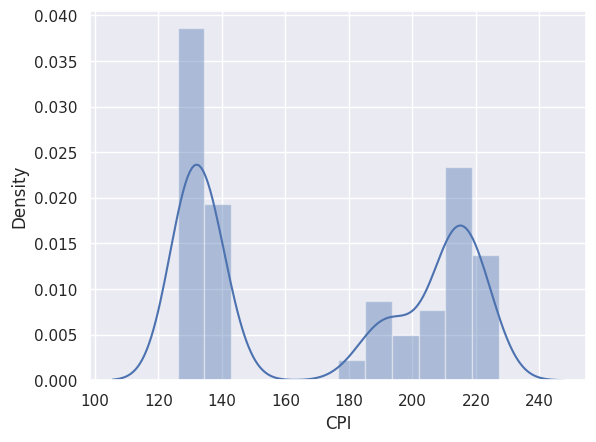

In [16]:
sns.distplot(df['CPI'])

<ipython-input-35-dddb115af7e2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weekly_Sales'])


<Axes: xlabel='Weekly_Sales', ylabel='Density'>

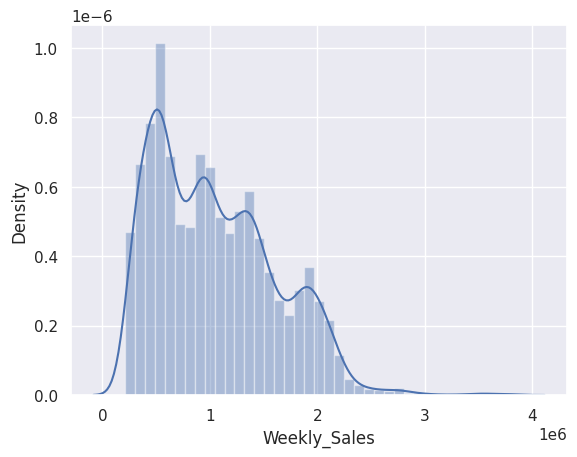

In [35]:
sns.distplot(df['Weekly_Sales'])

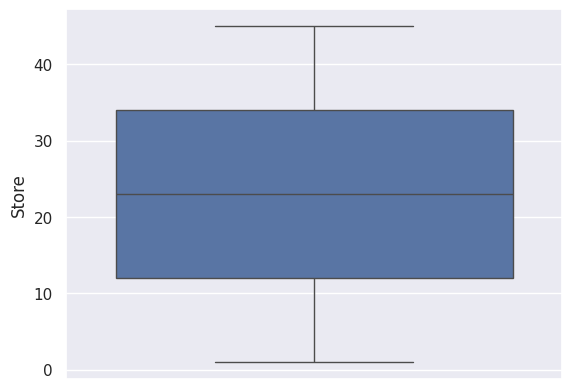

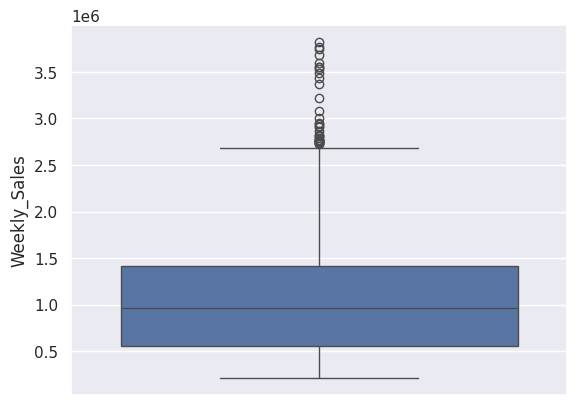

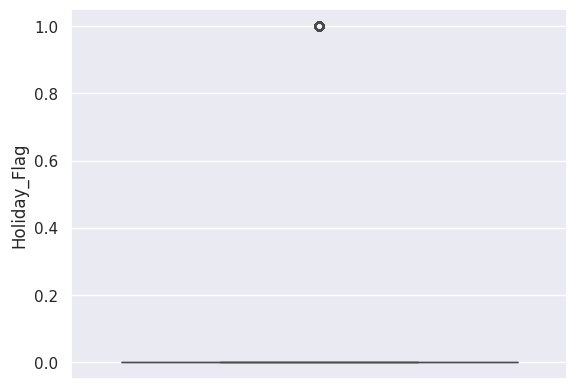

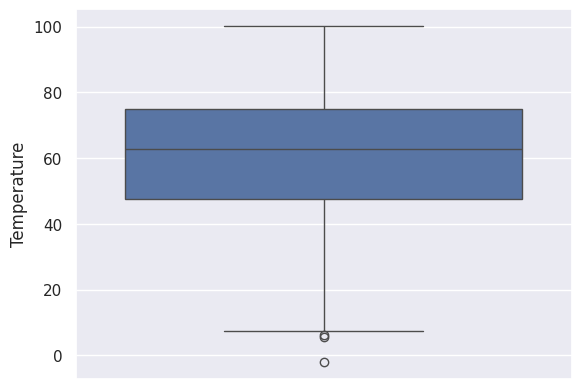

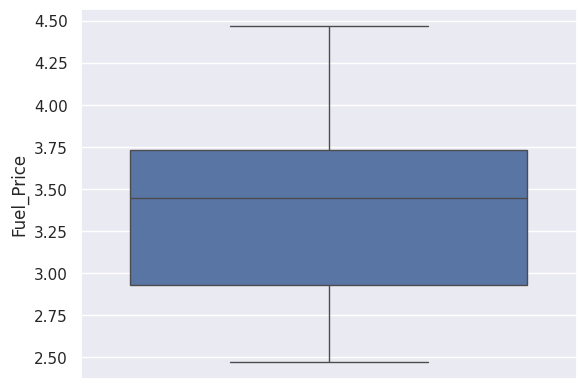

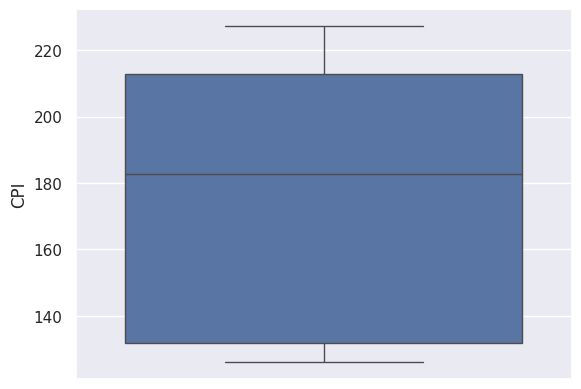

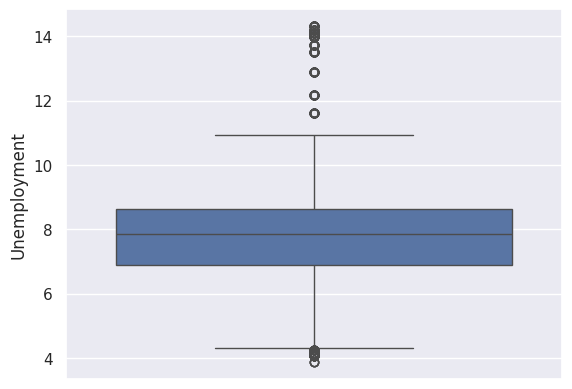

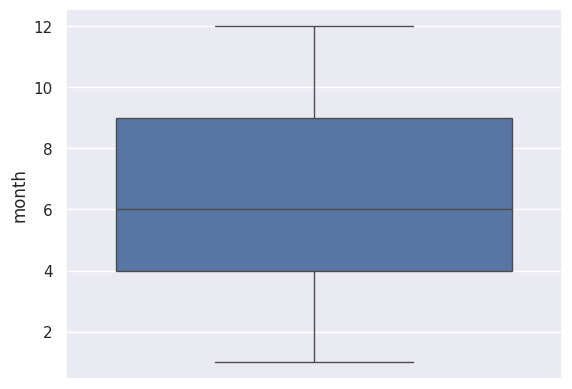

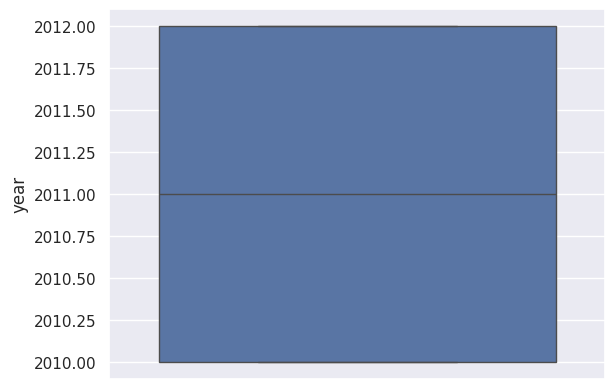

In [17]:
for col in df.columns:
  plt.figure()
  sns.boxplot(df[col])
# Outliers columns are ['WeeklySale' , 'Temperature' , 'Unemployment']

<ipython-input-23-d1a1434e2bf5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-23-d1a1434e2bf5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[i])
<ipython-input-23-d1a1434e2bf5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.

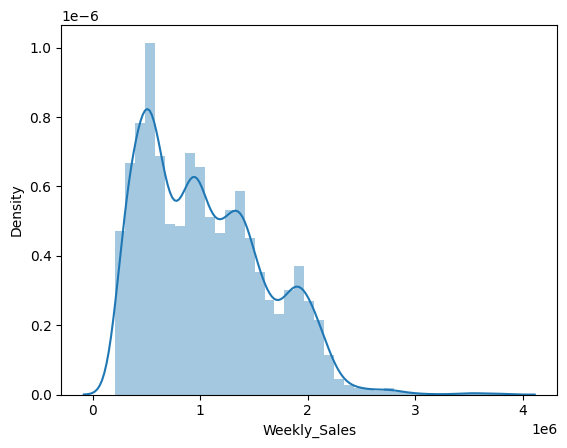

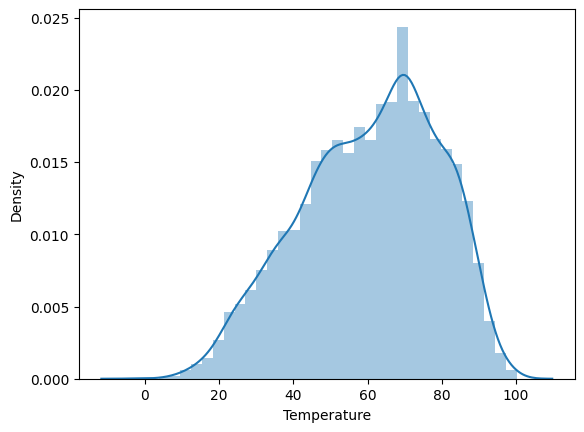

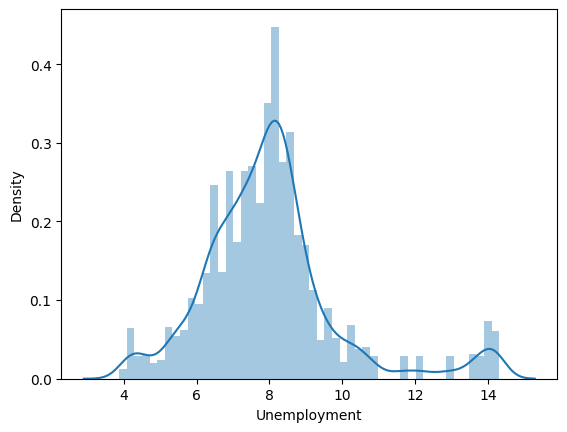

In [23]:
outliers_col = ['Weekly_Sales' , 'Temperature' , 'Unemployment']
for i in outliers_col:
  plt.figure()
  sns.distplot(df[i])

In [24]:
# we remove outliers or we can capping it with boundary value , we try both methods
# print(f'Initial we have {df.shape} size data') - (6435 , 9)
# First we try to remove outliers
new_df = df
for col in outliers_col:
  Q3 =  new_df[col].quantile(0.75)
  Q1 =  new_df[col].quantile(0.25)
  IQR = Q3 - Q1
  upper = Q3 + (1.5 * IQR)
  lower = Q1 - (1.5 * IQR)
  new_df = new_df.loc[(new_df[col] < upper) & (new_df[col] > lower) ]


In [25]:
new_df.shape , df.shape

((5917, 8), (6435, 8))

In [26]:
new_df.corr()['Weekly_Sales']

<ipython-input-26-abfa76d4e00c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  new_df.corr()['Weekly_Sales']


Store          -0.319354
Weekly_Sales    1.000000
Holiday_Flag    0.024390
Temperature    -0.041686
Fuel_Price      0.019664
CPI            -0.082977
Unemployment   -0.073092
Name: Weekly_Sales, dtype: float64

In [27]:
X = new_df.drop('Weekly_Sales',axis=1)
y = new_df['Weekly_Sales']

In [28]:

X.info() , y.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5917 entries, 0 to 6434
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5917 non-null   int64  
 1   Date          5917 non-null   object 
 2   Holiday_Flag  5917 non-null   int64  
 3   Temperature   5917 non-null   float64
 4   Fuel_Price    5917 non-null   float64
 5   CPI           5917 non-null   float64
 6   Unemployment  5917 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 369.8+ KB
<class 'pandas.core.series.Series'>
Int64Index: 5917 entries, 0 to 6434
Series name: Weekly_Sales
Non-Null Count  Dtype  
--------------  -----  
5917 non-null   float64
dtypes: float64(1)
memory usage: 92.5 KB


(None, None)

In [29]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=99)

In [30]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((4733, 7), (1184, 7), (4733,), (1184,))

In [36]:
pipeline.fit(X_train , y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocess',
                                                  FunctionTransformer(func=<function do_preprocess at 0x7bb78c4332e0>),
                                                  ['Date'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, device=None,
                              early_stopping_rounds=No...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

In [38]:
pipeline.score(X_test , y_test) , pipeline.predict(X_test)

(0.9709626236391057,
 array([1175456.2 , 1025092.06,  801663.56, ...,  294763.1 ,  978638.1 ,
        1419621.4 ], dtype=float32))

In [42]:
y_pred = pipeline.predict(X_test)
error_rate = mean_absolute_error(y_test , y_pred)
error_rate

58240.40003642314

In [31]:
from sklearn.metrics import r2_score , make_scorer  , mean_squared_error , mean_absolute_error
# Without removing outliers our r2_score is 0.9625 , mae is 61193 , rmse is 104076
# After removing outliers our r2_score is 0.9710 , mae is 58205 , rmse is 91175
r2_score(y_test , y_pred)

0.9710487148134426

In [32]:
# We have only 60k error rate
mean_absolute_error(y_test , y_pred)

58205.79116184544

In [33]:
np.sqrt(mean_squared_error(y_test , y_pred))

91175.1243590139

In [58]:
residuals = np.abs(np.array(y_test) - y_pred)

<ipython-input-68-5b640c7b75dc>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: ylabel='Density'>

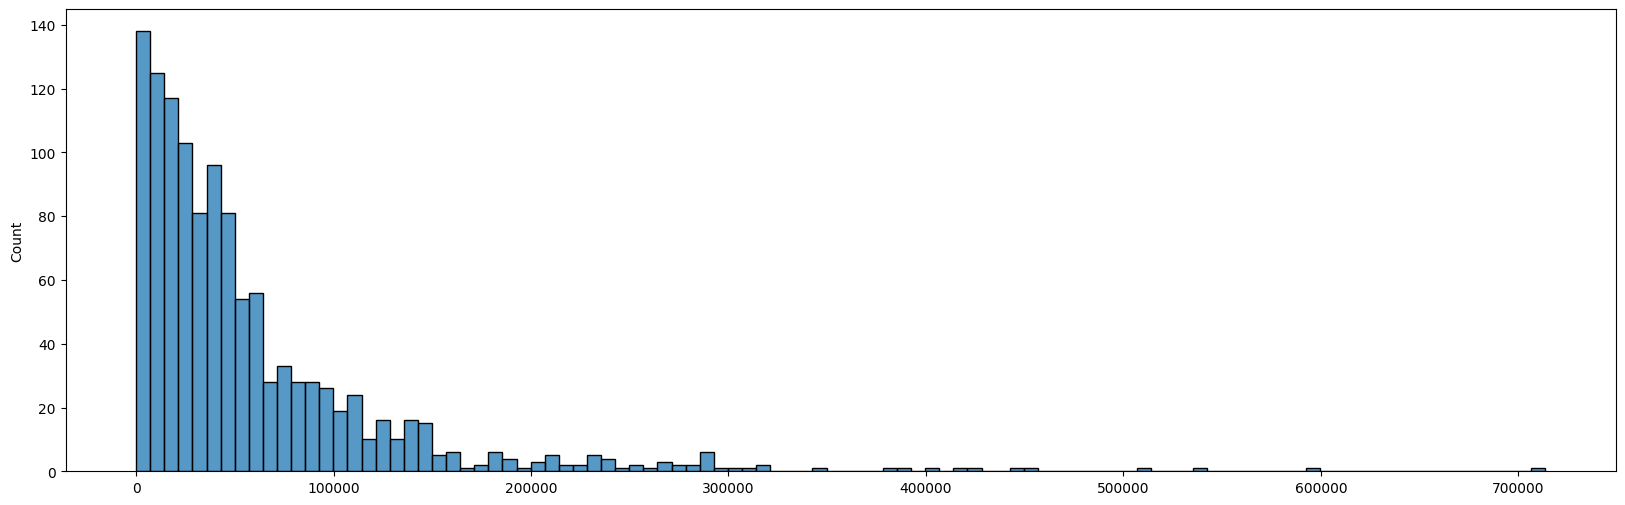

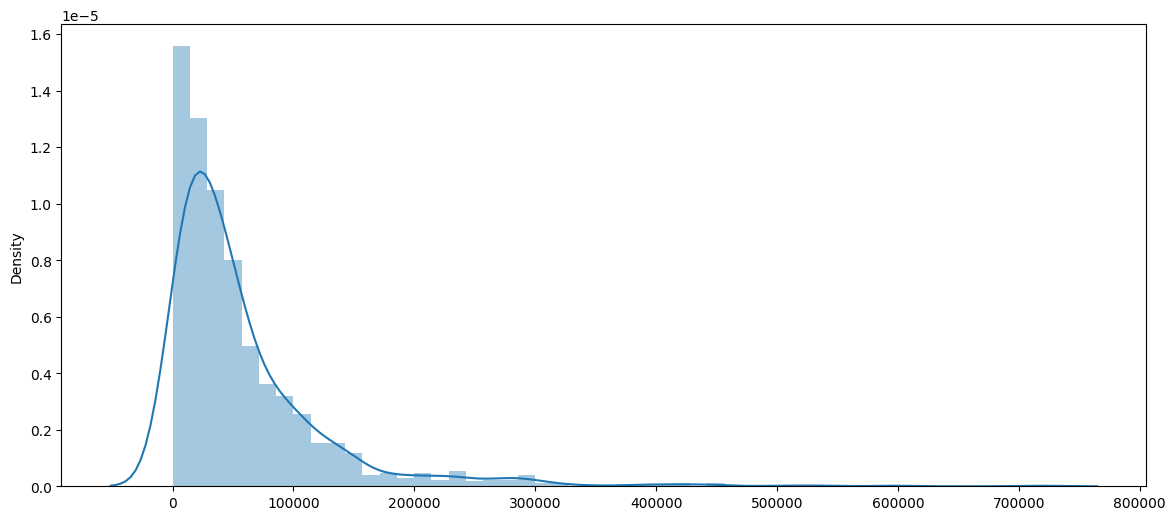

In [68]:
plt.figure(figsize=(20,6))
sns.histplot(residuals , bins=100)
plt.figure(figsize=(14,6))
sns.distplot(residuals)

In [70]:
# Here we try to scaling data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [78]:
xgr2 = XGBRegressor()
# xgr2.fit(X_train_scaled , y_train , verbose=True)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [91]:
# y_pred = xgr2.predict(X_test_scaled)
# r2_score(y_test , y_pred)

0.9710487148134426

In [81]:
# mean_absolute_error(y_test , y_pred)

58205.79116184544

In [92]:
# We get no changes after scaling
# Now we do hyper parameter tunning
from sklearn.model_selection import GridSearchCV
param_grid= {
    'learning_rate' : [0.1 , 0.2 , 0.3 , 0.4 ] ,
    'max_depth' : [ 3 , 4 , 5 , 6 , 7] ,
    'gamma' : [0.001 , 0.1 , 0.5 , 1] ,
    'n_estimators' : [90,100,120 , 130 , 140]
}
gsc = GridSearchCV(estimator = XGBRegressor() , param_grid=param_grid , cv=5 , n_jobs=-1)
# gsc.fit(X_train , y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             n_jobs=-1,
             param_grid={'gamma': [0.001, 0.1, 0.5, 1],
                         'learning_rate': [0.1, 0.2, 0.3, 0.4],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [90, 100, 120, 130, 140]})

In [93]:
# gsc.best_params_ , gsc.best_score_

({'gamma': 0.001, 'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 140},
 0.9704067626706283)

**Conclusion** :           
We get 97% R2 score at prediction side
Our loss is around 60k                                                          
Scaling parameters does not give improvement                                    
Hyperparameter tunning does not give improvement

In [53]:
# pipeline.predict()
X_train.head(1)


,Store,Date,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
2425,17,21-09-2012,0,58.43,3.821,131.010333,5.936


In [58]:
y_testing = pd.DataFrame({
    'Store':17,
    'Date' :'22-01-2012',
    'Holiday_Flag' : 0,
    'Temperature' : 54,
    'Fuel_Price' : 3.5,
    'CPI' : 130,
    'Unemployment' : 5}, index=[0])

In [59]:
pipeline.predict(y_testing)

array([881159.2], dtype=float32)

# **Save the model**

In [61]:
import pickle
with open('pipeline.pkl' , 'wb') as f:
  pickle.dump(pipeline , f)

In [62]:
with open('pipeline.pkl' , 'rb') as f:
  pipeline_saved = pickle.load(f)


In [67]:
pipeline_saved.predict(X_test)

array([1175456.2 , 1025092.06,  801663.56, ...,  294763.1 ,  978638.1 ,
       1419621.4 ], dtype=float32)